In [0]:
import pandas as pd

In [0]:
# Load the Activity Recognition from Single Chest-Mounted Accelerometer dataset.
# The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer.
df = pd.read_csv('./drive/My Drive/ML_Code/Human Activity Recognition/HAR/1.csv', header=None)
df.columns = ['index', 'x', 'y', 'z', 'activity']

In [100]:
df.head()

,index,x,y,z,activity
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [101]:
df.tail()

,index,x,y,z,activity
162496,162500.0,1927,2388,2074,7
162497,162500.0,1930,2383,2074,7
162498,162500.0,1929,2385,2076,7
162499,162500.0,1926,2385,2078,7
162500,162500.0,1922,2387,2078,0


In [102]:
df['activity'].value_counts(normalize=True)

7    0.515369
1    0.207242
4    0.165291
3    0.068793
5    0.019637
6    0.017951
2    0.005711
0    0.000006
Name: activity, dtype: float64

In [103]:
df['activity'].value_counts()

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
0        1
Name: activity, dtype: int64

In [0]:
df = df[df.activity != 0]

In [105]:
df['activity'].value_counts()

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
Name: activity, dtype: int64

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
X = df[['x', 'y', 'z']]
# create our feature matrix by removing the response variable
y = df['activity']

In [108]:
# Min-Max Normailzation.
X['x'] = (X['x']-X['x'].min()) / (X['x'].max()-X['x'].min())
X['y'] = (X['y']-X['y'].min()) / (X['y'].max()-X['y'].min())
X['z'] = (X['z']-X['z'].min()) / (X['z'].max()-X['z'].min())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [109]:
# Split the dataset into the training set and test subsets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(113750, 3) (48750, 3) (113750,) (48750,)


In [0]:
# KNN parameters to try
knn_params = {'n_neighbors':[3, 4, 5, 6]}

In [111]:
%%time
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params)
#grid.fit(X, y)
grid.fit(X_train, y_train)

CPU times: user 16.2 s, sys: 8.78 ms, total: 16.2 s
Wall time: 16.3 s


In [112]:
# Predict.
%%time
y_pred = grid.predict(X_test)

CPU times: user 1.51 s, sys: 2.98 ms, total: 1.51 s
Wall time: 1.51 s


In [113]:
print(grid.best_score_, grid.best_params_)

0.8416087912087914 {'n_neighbors': 6}


In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

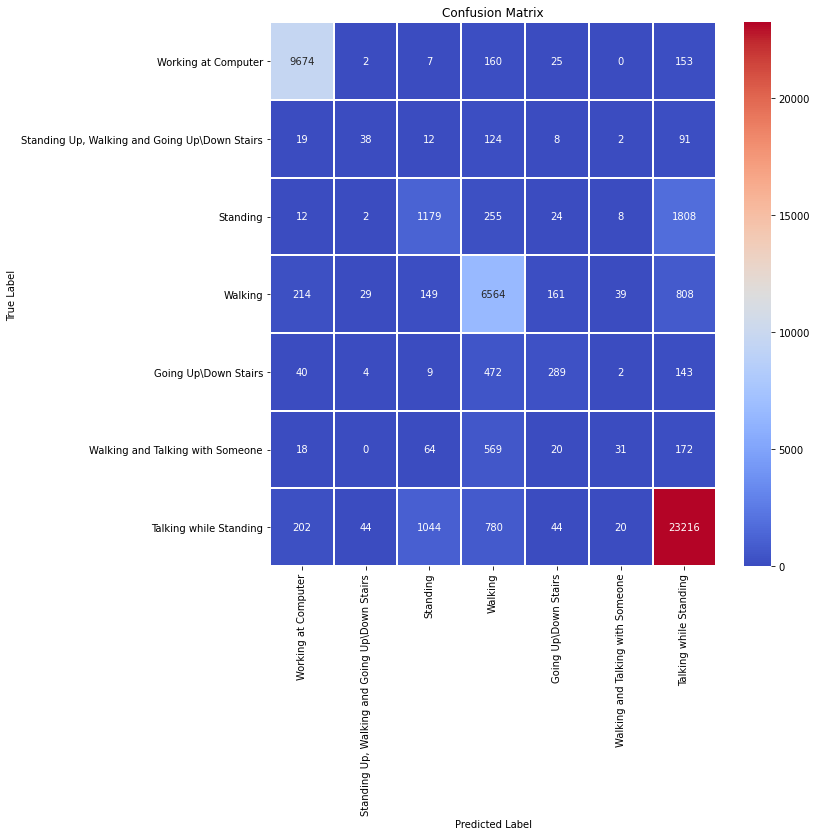

In [115]:
# Same labels will be reused throughout the program
LABELS = ['Working at Computer',
          'Standing Up, Walking and Going Up\Down Stairs',
          'Standing',
          'Walking',
          'Going Up\Down Stairs',
          'Walking and Talking with Someone',
          'Talking while Standing']

y_pred = grid.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm,
            cmap='coolwarm',
            linecolor='white',
            linewidths=1,
            xticklabels=LABELS,
            yticklabels=LABELS,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
plt.show()

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96     10021
           2       0.32      0.13      0.18       294
           3       0.48      0.36      0.41      3288
           4       0.74      0.82      0.78      7964
           5       0.51      0.30      0.38       959
           6       0.30      0.04      0.06       874
           7       0.88      0.92      0.90     25350

    accuracy                           0.84     48750
   macro avg       0.60      0.50      0.52     48750
weighted avg       0.82      0.84      0.83     48750

